In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe().T # içeriğin bilgisinin transpozu 

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
# sütun adlarının değiştirilmesi
# inplace=true yaparak yeni bir değişkene gerek kalmadan kaydetme işlemi yapılabilir
df_guncel = df.rename(columns = {"total_bill":"fiyat","tip":"bahsis","sex":"cinsiyet","smoker":"sigaradurumu","day":"gunler","time":"zaman","size":"kisiler"})
df_guncel.head()

,fiyat,bahsis,cinsiyet,sigaradurumu,gunler,zaman,kisiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
cinsiyet=df_guncel.cinsiyet.unique()
gunler = df_guncel.gunler.unique()
zaman = df_guncel.zaman.unique()
sigara = df_guncel.sigaradurumu.unique()
print(cinsiyet)
print(gunler)
print(zaman)
print(sigara)

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']


In [8]:
# içeriklerin değiştirilmesi

#cinsiyet
df_guncel["cinsiyet"]=df_guncel.cinsiyet.map({"Female":"kadin",
                                              "Male":"erkek"})

#günler
df_guncel["gunler"]=df_guncel.gunler.map({"Thur":"persembe",
                                          "Fri":"cuma",
                                          "Sat":"cumartesi",
                                          "Sun":"pazar"})

# zaman
df_guncel["zaman"]=df_guncel.zaman.map({"Lunch":"ogle",
                                        "Dinner":"aksam"})

# sigara
df_guncel["sigaradurumu"] = df_guncel.sigaradurumu.map({"Yes":"evet",
                                                        "No":"hayir"})
df_guncel.head()

,fiyat,bahsis,cinsiyet,sigaradurumu,gunler,zaman,kisiler
0,16.99,1.01,kadin,hayir,pazar,aksam,2
1,10.34,1.66,erkek,hayir,pazar,aksam,3
2,21.01,3.50,erkek,hayir,pazar,aksam,3
3,23.68,3.31,erkek,hayir,pazar,aksam,2
4,24.59,3.61,kadin,hayir,pazar,aksam,4


In [9]:
import matplotlib.pyplot as plt

In [10]:
print(df_guncel.cinsiyet.value_counts())
print("--------------------------------")
print(df_guncel.sigaradurumu.value_counts())
print("--------------------------------")
print(df_guncel.gunler.value_counts())
print("--------------------------------")
print(df_guncel.zaman.value_counts())
print("--------------------------------")
print(df_guncel.kisiler.value_counts())

cinsiyet
erkek    157
kadin     87
Name: count, dtype: int64
--------------------------------
sigaradurumu
hayir    151
evet      93
Name: count, dtype: int64
--------------------------------
gunler
cumartesi    87
pazar        76
persembe     62
cuma         19
Name: count, dtype: int64
--------------------------------
zaman
aksam    176
ogle      68
Name: count, dtype: int64
--------------------------------
kisiler
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


<Axes: ylabel='count'>

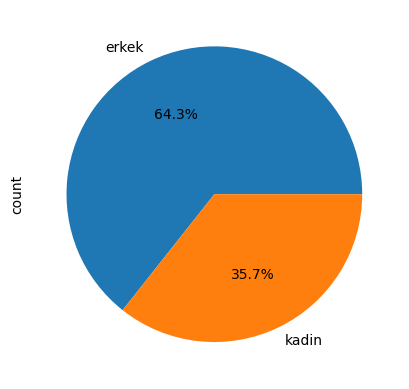

In [11]:
df_guncel.cinsiyet.value_counts().plot(kind = "pie",autopct = "%.1f%%")

<Axes: ylabel='count'>

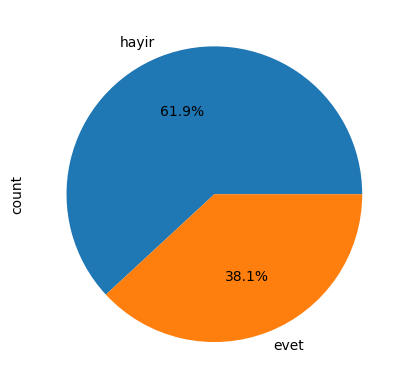

In [12]:
df_guncel.sigaradurumu.value_counts().plot(kind = "pie",autopct = "%.1f%%")

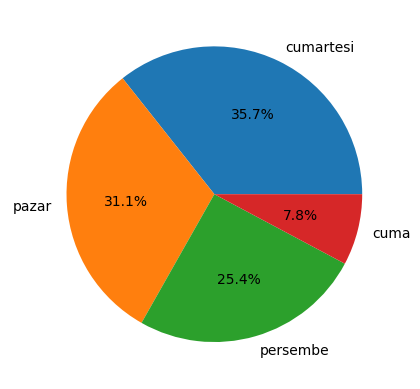

In [13]:
df_guncel.gunler.value_counts().plot(kind = "pie",autopct = "%.1f%%")
plt.ylabel(" ");

<Axes: ylabel='count'>

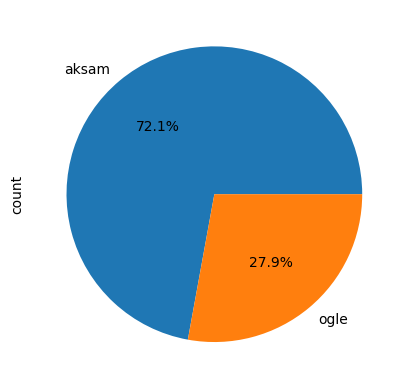

In [14]:
df_guncel.zaman.value_counts().plot(kind = "pie",autopct = "%.1f%%")

<Axes: ylabel='count'>

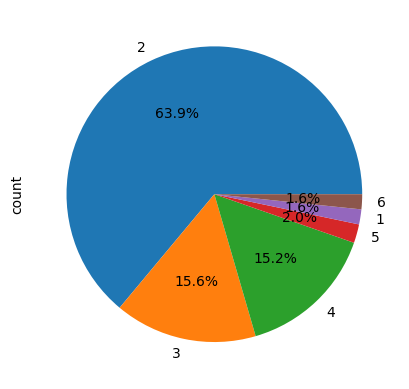

In [15]:
df_guncel.kisiler.value_counts().plot(kind = "pie",autopct = "%.1f%%")

<Axes: xlabel='zaman', ylabel='bahsis'>

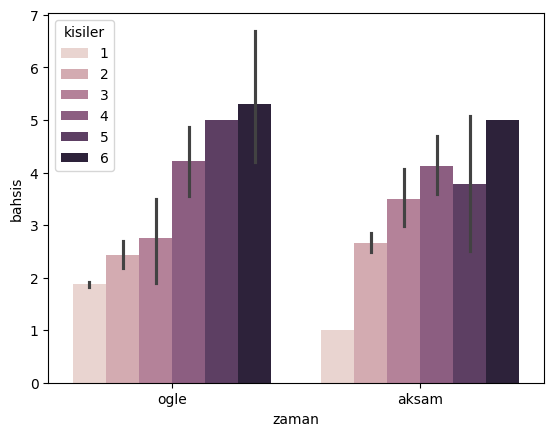

In [16]:
sns.barplot(x ="zaman",y="bahsis",hue="kisiler",data = df_guncel)

In [17]:
# cinsiyet sayısal veri haline getirme
df_guncel["cinsiyet"]=df_guncel.cinsiyet.map({"kadin":1,
                                              "erkek":2})

In [18]:
# sigara durumu sayısal veri haline getirme
df_guncel["sigaradurumu"] = df_guncel.sigaradurumu.map({"hayir":2,
                                                        "evet":1})

In [19]:
# gunler sayısal veri haline getirme
df_guncel["gunler"] = df_guncel.gunler.map({"persembe":1,
                                            "cuma":2,
                                            "cumartesi":3,
                                            "pazar":4})

In [20]:
# zaman sayısal veri haline getirme
df_guncel["zaman"] = df_guncel.zaman.map({"ogle":1,
                                          "aksam":2})

In [21]:
df_guncel.head()

,fiyat,bahsis,cinsiyet,sigaradurumu,gunler,zaman,kisiler
0,16.99,1.01,1,2,4,2,2
1,10.34,1.66,2,2,4,2,3
2,21.01,3.50,2,2,4,2,3
3,23.68,3.31,2,2,4,2,2
4,24.59,3.61,1,2,4,2,4


In [23]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
# eğitim ve test verisinin ayırılması
# X = bağımsız değişken y=bağımlı değişken
X = df_guncel.drop(["fiyat"],axis =1)
y = df_guncel["fiyat"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [26]:
X_train[0:10]

,bahsis,cinsiyet,sigaradurumu,gunler,zaman,kisiler
228,2.72,2,2,3,2,2
208,2.03,2,1,3,2,2
96,4.00,2,1,2,2,2
167,4.50,2,2,4,2,4
84,2.03,2,2,1,1,2
55,3.51,2,2,4,2,2
86,2.00,2,2,1,1,2
172,5.15,2,1,4,2,2
242,1.75,2,2,3,2,2
152,2.74,2,2,4,2,3


In [27]:
y_train[0:10]

228    13.28
208    24.27
96     27.28
167    31.71
84     15.98
55     19.49
86     13.03
172     7.25
242    17.82
152    17.26
Name: fiyat, dtype: float64

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(195, 6)
(49, 6)
(195,)
(49,)


In [29]:
# Model oluşturma aşamaları
knn_modeli = KNeighborsRegressor()
knn_modeli

KNeighborsRegressor()

In [31]:
model = knn_modeli.fit(X_train,y_train)

In [32]:
model

KNeighborsRegressor()

In [34]:
#bahşiş = 2, cinsiyet=kadın,sigara durumu = evet,gunler=perşembe, zaman=akşam, kişiler=2
deneme_verisi = [[2],[1],[1],[1],[2],[2]]
deneme_verisi = pd.DataFrame(deneme_verisi).T # model tahmin yapabilmesi için transpozu alınmalı

In [35]:
model.predict(deneme_verisi)

array([12.764])

In [37]:
y_pred = model.predict(X_test)

In [38]:
# test hatası öğrenme
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(6.698439154164261)

In [39]:
#eğitim atası
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

np.float64(5.122797228678278)

In [41]:
# 30a kadar komşu sayısını değiştirerek modelimizi eğiterek sonuçlarını görme işlemi (eğitim hatası)
for k in range(30):
    k = k+1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = k_model.predict(X_train)
    hata_orani = np.sqrt(mean_squared_error(y_train,y_pred))

    print("k değeri = ", k, "eğitim hatası değeri = " ,hata_orani)

k değeri =  1 eğitim hatası değeri =  1.4968462572852022
k değeri =  2 eğitim hatası değeri =  4.167074959482817
k değeri =  3 eğitim hatası değeri =  4.6896942598331774
k değeri =  4 eğitim hatası değeri =  5.079752823711012
k değeri =  5 eğitim hatası değeri =  5.122797228678278
k değeri =  6 eğitim hatası değeri =  5.2772201468796505
k değeri =  7 eğitim hatası değeri =  5.445193549279551
k değeri =  8 eğitim hatası değeri =  5.470083982356986
k değeri =  9 eğitim hatası değeri =  5.6697702986099605
k değeri =  10 eğitim hatası değeri =  5.766707951682658
k değeri =  11 eğitim hatası değeri =  5.818068288883619
k değeri =  12 eğitim hatası değeri =  5.813599419964534
k değeri =  13 eğitim hatası değeri =  5.858655167374318
k değeri =  14 eğitim hatası değeri =  5.9173129703536596
k değeri =  15 eğitim hatası değeri =  5.999474977978991
k değeri =  16 eğitim hatası değeri =  6.016636113160668
k değeri =  17 eğitim hatası değeri =  6.045158835209828
k değeri =  18 eğitim hatası değeri

In [42]:
# 30a kadar komşu sayısını değiştirerek modelimizi eğiterek sonuçlarını görme işlemi (test hatası)
for k in range(30):
    k = k+1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = k_model.predict(X_test)
    hata_orani = np.sqrt(mean_squared_error(y_test,y_pred))

    print("k değeri = ", k, "eğitim hatası değeri = " ,hata_orani)

k değeri =  1 eğitim hatası değeri =  7.829804777715908
k değeri =  2 eğitim hatası değeri =  7.234484241803141
k değeri =  3 eğitim hatası değeri =  6.770002327863291
k değeri =  4 eğitim hatası değeri =  6.662769560346937
k değeri =  5 eğitim hatası değeri =  6.698439154164261
k değeri =  6 eğitim hatası değeri =  6.579390664740496
k değeri =  7 eğitim hatası değeri =  6.478038579698846
k değeri =  8 eğitim hatası değeri =  6.508237732787547
k değeri =  9 eğitim hatası değeri =  6.300136510856696
k değeri =  10 eğitim hatası değeri =  6.233508426730685
k değeri =  11 eğitim hatası değeri =  6.341662302236538
k değeri =  12 eğitim hatası değeri =  6.424686459478603
k değeri =  13 eğitim hatası değeri =  6.43849090525573
k değeri =  14 eğitim hatası değeri =  6.56263800751339
k değeri =  15 eğitim hatası değeri =  6.545126436020321
k değeri =  16 eğitim hatası değeri =  6.644118266066773
k değeri =  17 eğitim hatası değeri =  6.743381127164526
k değeri =  18 eğitim hatası değeri =  6.8

In [43]:
# en ideal k değerini bulma işlemi için algoritma modeli
knn_degerleri = {"n_neighbors":np.arange(1,30,1)} # komşu sayıları 1den 30 a kadar 1 er artarak 30 dahil değil

In [44]:
knn = KNeighborsRegressor()

In [45]:
# cross validation işlemi yaparak sonuçları daha detaylı inceleme
knn_cv_model = GridSearchCV(knn,knn_degerleri,cv=10)

In [46]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [47]:
knn_cv_model.best_params_

{'n_neighbors': np.int64(6)}

In [48]:
# ideal k değeri ile model eğitme
ideal_knn_modeli = KNeighborsRegressor(n_neighbors=6)

In [49]:
ideal_knn_modeli = model.fit(X_train,y_train)

In [50]:
ideal_knn_modeli

KNeighborsRegressor()

In [52]:
ideal_knn_modeli.predict(deneme_verisi)

array([12.764])

In [53]:
ideal_knn_modeli.predict(X_test)

array([14.982, 15.632, 19.088, 30.012, 13.694, 19.398, 15.738, 14.512,
       18.522, 22.062, 17.438, 13.194, 10.664, 19.398, 12.342, 10.664,
       22.692, 18.394, 17.1  , 27.882, 20.588, 19.986, 20.058, 13.194,
       25.964, 13.346, 13.468, 18.508, 19.088, 27.494, 22.126, 16.724,
       18.44 , 20.32 , 21.34 , 20.6  , 12.814, 27.84 , 15.888, 15.07 ,
       13.194, 12.11 , 15.498, 16.476, 14.794, 14.112, 15.348, 17.674,
       13.272])

In [54]:
y_test[0:10]

24     19.82
6       8.77
153    24.55
211    25.89
198    13.00
176    17.89
192    28.44
124    12.48
9      14.78
101    15.38
Name: fiyat, dtype: float64

In [56]:
tahmin_degerleri = pd.DataFrame({"y_test":y_test,
             "tahmin degerleri":ideal_knn_modeli.predict(X_test)
             })

In [58]:
tahmin_degerleri["fark"] = tahmin_degerleri["y_test"] - tahmin_degerleri["tahmin degerleri"]

In [59]:
tahmin_degerleri.head()

,y_test,tahmin degerleri,fark
24,19.82,14.982,4.838
6,8.77,15.632,-6.862
153,24.55,19.088,5.462
211,25.89,30.012,-4.122
198,13.00,13.694,-0.694


In [60]:
np.sqrt(mean_squared_error(y_train,ideal_knn_modeli.predict(X_train)))

np.float64(5.122797228678278)

In [62]:
np.sqrt(-1*cross_val_score(ideal_knn_modeli,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")).mean()

np.float64(6.2713191683065785)